In [7]:
#importing necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [8]:
#Data Collection 
path=r'C:\Users\srava\Downloads\Airqualityprediction\air_quality_dataset.csv'
#loading the dataset
df=pd.read_csv(path)

In [9]:
#checking for missing values
print("Missing values count: ")
print(df.isnull().sum())

Missing values count: 
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [10]:
#checking data types of each column
print(df.dtypes)

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object


In [11]:
#checking for how many are Good and Bad 
df['Air Quality'].value_counts()

Air Quality
Good    2750
Poor    1500
Name: count, dtype: int64

In [12]:
#Number of Unique values
df.nunique()

Temperature                      362
Humidity                         722
PM2.5                            777
PM10                             915
NO2                              445
SO2                              346
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        2
dtype: int64

In [13]:
df1=df
df1

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Poor
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
...,...,...,...,...,...,...,...,...,...,...
4245,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Poor
4246,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Good
4247,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Good
4248,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [14]:
#converting objects to numerical values
dist=(df['Air Quality'])
distset=set(dist)
dd=list(distset)
dictofwords={ dd[i] : i for i in range(0,len(dd))}
df['Air Quality']=df['Air Quality'].map(dictofwords)



In [15]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0
...,...,...,...,...,...,...,...,...,...,...
4245,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,0
4246,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,1
4247,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,1
4248,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,1


In [16]:
#detecting outlier using z-score
z_score=stats.zscore(df)
outliers=np.abs(z_score)>3
print(df[outliers.any(axis=1)])

      Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
21           52.5      83.9   67.5   91.2  31.6  34.6  2.31   
41           46.1     100.3  144.0  169.8  42.5  16.1  2.30   
47           32.0      69.7   95.7  110.4  36.1  20.5  2.30   
52           58.6      66.0   44.0   54.0  44.3  22.7  3.09   
89           46.8      91.6  240.1  261.5  40.3  37.6  2.46   
...           ...       ...    ...    ...   ...   ...   ...   
4188         48.8      95.8    9.8   28.0  36.0  33.7  2.59   
4236         35.6     103.8   74.5   93.3  31.8  23.6  2.04   
4239         44.4     102.1   35.4   54.7  55.5  25.5  1.79   
4240         46.8      93.8   11.8   25.4  33.8  28.7  3.27   
4245         40.6      74.1  116.0  126.7  45.5  25.7  2.11   

      Proximity_to_Industrial_Areas  Population_Density  Air Quality  
21                              2.9                 785            0  
41                              7.3                 443            0  
47                            

In [17]:
'''df=df[~outliers.any(axis=1)]
print(df)'''

'df=df[~outliers.any(axis=1)]\nprint(df)'

In [18]:
#Detecting Outliers using IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
outliers=df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("Outliers: ",outliers)

Outliers:        Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
21           52.5      83.9   67.5   91.2  31.6  34.6  2.31   
25           29.7      85.8   84.4   94.4  26.7  19.8  1.55   
30           33.3      70.1   55.1   72.7  40.5  30.7  2.12   
31           37.5      83.7    3.1    2.2  39.5  29.2  2.61   
33           39.3      78.9   68.9   85.2  43.7  13.0  1.70   
...           ...       ...    ...    ...   ...   ...   ...   
4236         35.6     103.8   74.5   93.3  31.8  23.6  2.04   
4239         44.4     102.1   35.4   54.7  55.5  25.5  1.79   
4240         46.8      93.8   11.8   25.4  33.8  28.7  3.27   
4245         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4249         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density  Air Quality  
21                              2.9                 785            0  
25                             10.0                 744            0  
30                 

In [19]:
#dropping Outliers
df=df.drop(outliers.index)

In [20]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,0
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,0
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,0
...,...,...,...,...,...,...,...,...,...,...
4243,34.9,77.7,32.3,47.1,17.4,11.5,1.63,8.8,541,1
4244,31.1,61.0,27.1,31.1,13.0,3.8,0.98,13.4,278,1
4246,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,1
4247,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,1


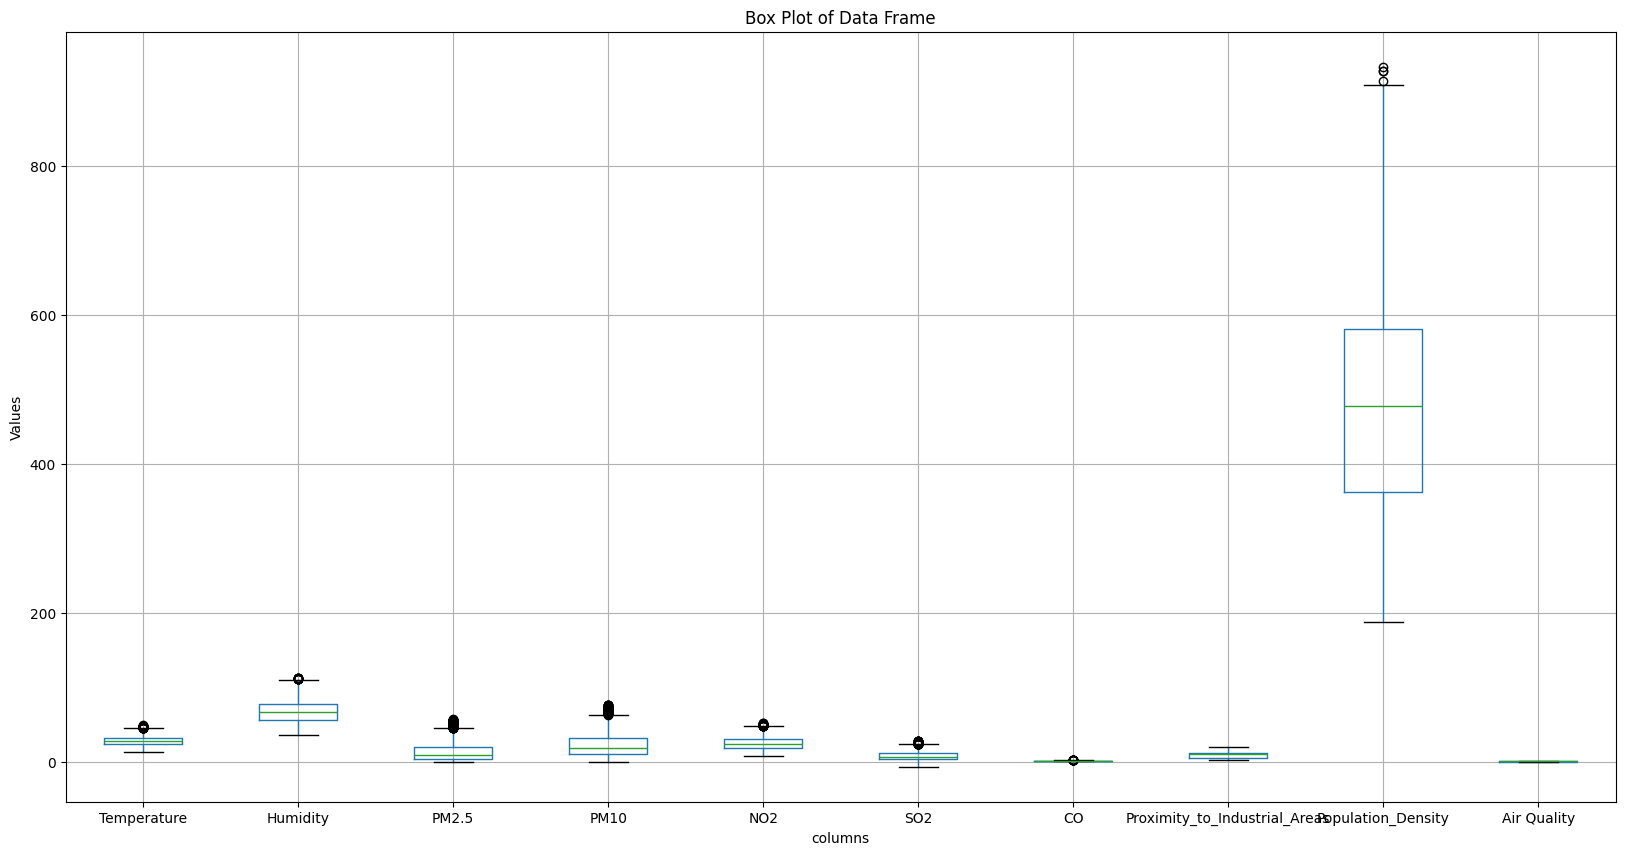

In [21]:
#Representing outliers using Box Plot
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Box Plot of Data Frame")
plt.xlabel("columns")
plt.ylabel("Values")
plt.show()

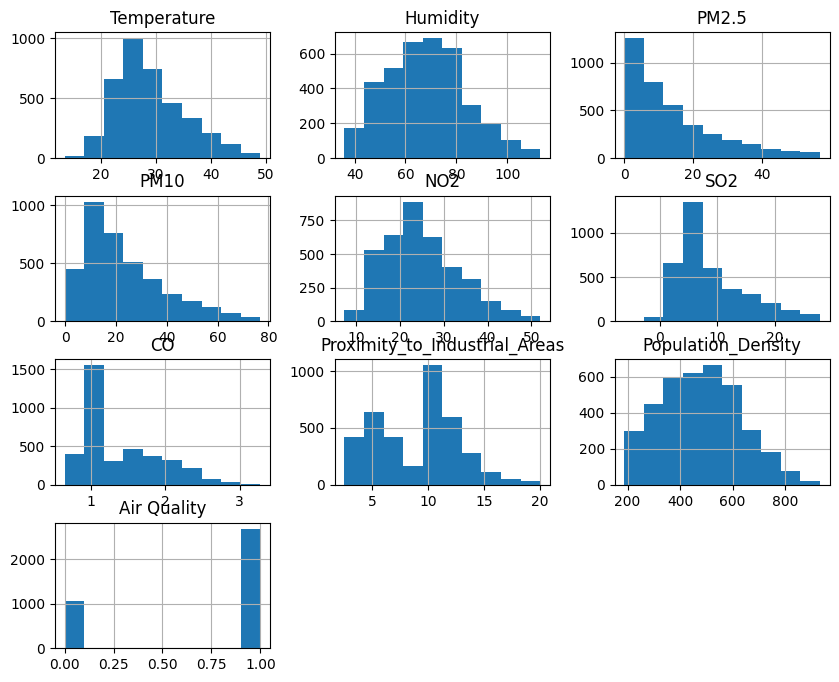

In [22]:
#EDA
#Histograms
df.hist(figsize=(10,8))
plt.show()

In [23]:
corr_matrix=df.corr()
corr_matrix

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
Temperature,1.000000,0.468656,0.255692,0.445629,0.588315,0.578189,0.691741,-0.617459,0.460752,-0.667664
Humidity,0.468656,1.000000,0.209534,0.366064,0.488185,0.454857,0.575510,-0.491434,0.395299,-0.567040
PM2.5,0.255692,0.209534,1.000000,0.920608,0.273418,0.270897,0.329378,-0.300597,0.217083,-0.292080
PM10,0.445629,0.366064,0.920608,1.000000,0.465483,0.460611,0.556851,-0.499907,0.374448,-0.514853
NO2,0.588315,0.488185,0.273418,0.465483,1.000000,0.588149,0.713176,-0.637918,0.492945,-0.698532
SO2,0.578189,0.454857,0.270897,0.460611,0.588149,1.000000,0.699991,-0.616244,0.469358,-0.689413
CO,0.691741,0.575510,0.329378,0.556851,0.713176,0.699991,1.000000,-0.752139,0.588823,-0.825437
Proximity_to_Industrial_Areas,-0.617459,-0.491434,-0.300597,-0.499907,-0.637918,-0.616244,-0.752139,1.000000,-0.517519,0.674868
Population_Density,0.460752,0.395299,0.217083,0.374448,0.492945,0.469358,0.588823,-0.517519,1.000000,-0.564523
Air Quality,-0.667664,-0.567040,-0.292080,-0.514853,-0.698532,-0.689413,-0.825437,0.674868,-0.564523,1.000000


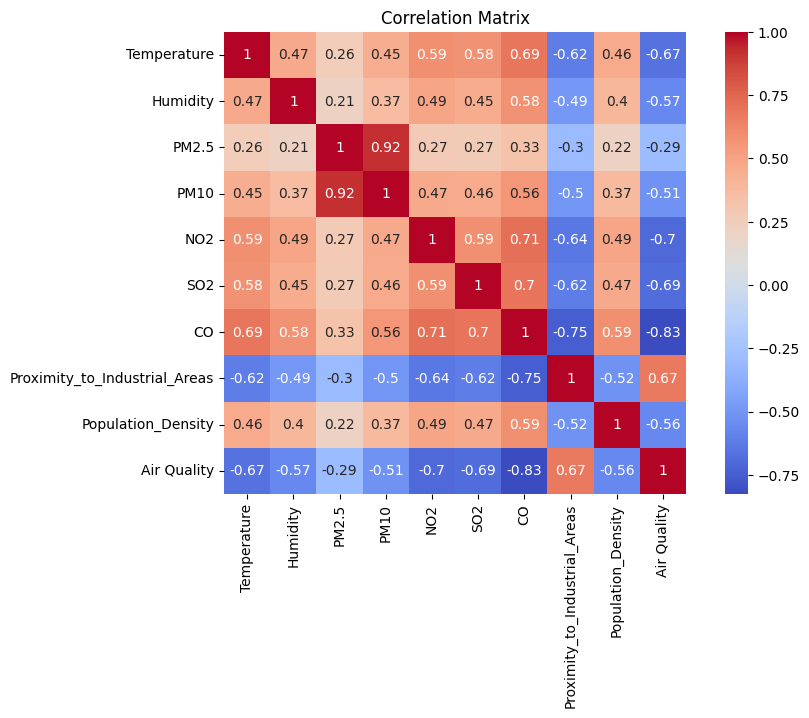

In [24]:
#correlation matrix
corr_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)
plt.title('Correlation Matrix')
plt.show()


In [25]:
#Extracting key features
key_features=corr_matrix.nlargest(5,'Air Quality')['Air Quality'].index
print(key_features)

Index(['Air Quality', 'Proximity_to_Industrial_Areas', 'PM2.5', 'PM10',
       'Population_Density'],
      dtype='object')


In [26]:
#calculating variance
variance=df1.var()
print(variance)

Temperature                         50.119128
Humidity                           269.053900
PM2.5                              632.022767
PM10                               800.590576
NO2                                 88.649743
SO2                                 50.569319
CO                                   0.343668
Proximity_to_Industrial_Areas       14.275677
Population_Density               25176.624260
Air Quality                          0.228427
dtype: float64


In [27]:
#Checking for low variance features
low_variance_threshold=0.1
low_variance_features=variance[variance<low_variance_threshold]
print(low_variance_features)

Series([], dtype: float64)


In [28]:
#Feature Engineering
#scale the data using StandardScaler
scaler=StandardScaler()
df[['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO','Proximity_to_Industrial_Areas','Population_Density']]=scaler.fit_transform(df[['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO','Proximity_to_Industrial_Areas','Population_Density']])

In [29]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,-0.296933,-1.864740,-0.613561,-1.071715,-1.359146,-0.602029,-0.489189,0.549656,0.481886,1
1,-0.392509,0.168644,-0.551727,-0.457652,-0.366374,-0.552082,-0.758689,0.989602,-1.163899,1
2,1.662370,1.835247,0.043426,0.776805,2.115556,1.495735,0.800561,-1.650077,1.298142,0
3,2.028744,0.927946,-0.953649,-0.470313,0.720948,0.629991,0.762061,-1.237628,1.702952,0
4,0.069440,1.655074,-0.288932,-0.033505,2.375568,0.480151,1.204811,-1.017654,0.050531,0
...,...,...,...,...,...,...,...,...,...,...
4243,0.945552,0.619078,1.411505,1.511148,-0.898216,0.430204,0.434811,-0.082768,0.415524,1
4244,0.340238,-0.455527,1.009584,0.498261,-1.418239,-0.851763,-0.816439,1.182079,-1.329805,1
4246,-0.137640,1.854552,-0.551727,0.112098,0.035462,0.313662,0.261561,-0.935164,1.530410,1
4247,-0.488085,0.651251,0.012509,-0.071488,1.158240,-0.185806,0.434811,0.137206,-0.659546,1


In [30]:
#droping PM2.5 column
df=df.drop(['PM2.5'],axis=1)
df

,Temperature,Humidity,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,-0.296933,-1.864740,-1.071715,-1.359146,-0.602029,-0.489189,0.549656,0.481886,1
1,-0.392509,0.168644,-0.457652,-0.366374,-0.552082,-0.758689,0.989602,-1.163899,1
2,1.662370,1.835247,0.776805,2.115556,1.495735,0.800561,-1.650077,1.298142,0
3,2.028744,0.927946,-0.470313,0.720948,0.629991,0.762061,-1.237628,1.702952,0
4,0.069440,1.655074,-0.033505,2.375568,0.480151,1.204811,-1.017654,0.050531,0
...,...,...,...,...,...,...,...,...,...
4243,0.945552,0.619078,1.511148,-0.898216,0.430204,0.434811,-0.082768,0.415524,1
4244,0.340238,-0.455527,0.498261,-1.418239,-0.851763,-0.816439,1.182079,-1.329805,1
4246,-0.137640,1.854552,0.112098,0.035462,0.313662,0.261561,-0.935164,1.530410,1
4247,-0.488085,0.651251,-0.071488,1.158240,-0.185806,0.434811,0.137206,-0.659546,1


In [31]:
#Machine Learning Model Development
#split data into training and testing
x=df.drop('Air Quality',axis=1)
y=df['Air Quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

RANMDOM FOREST MODEL

In [32]:
#Random forest classifier model
rf=RandomForestClassifier(n_estimators=100,random_state=42)
#train the model
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
#make prediction
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [33]:
#Evalute the model
accuracy=accuracy_score(y_test,y_pred)*100
precision=precision_score(y_test,y_pred,average='weighted')*100
recall=recall_score(y_test,y_pred,average='weighted')*100
f1=f1_score(y_test,y_pred,average='weighted')*100
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1_Score:{f1:.2f}")

Accuracy:98.80
Precision:98.82
Recall:98.80
F1_Score:98.81


In [34]:
#calculating cross validation score
rf=RandomForestClassifier(n_estimators=100,random_state=42)
from sklearn.model_selection import cross_val_score,learning_curve
#cross-validation scores
scores=cross_val_score(rf,x_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.9833887  0.96843854 0.98006645 0.98837209 0.9833887 ]
0.9807308970099667


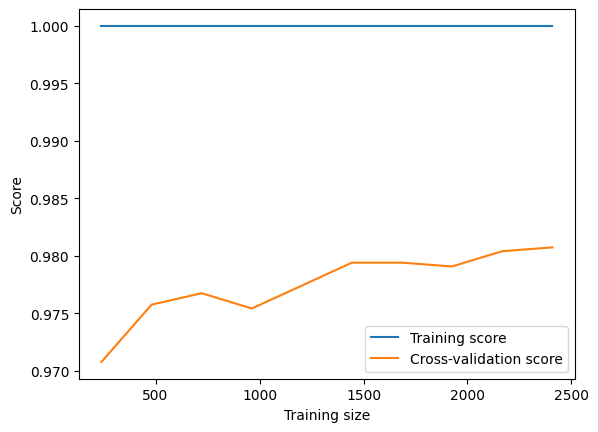

In [35]:
#learning curve
train_sizes,train_scores,test_scores=learning_curve(rf,x_train,y_train,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1.0,10))
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
plt.plot(train_sizes,train_scores_mean,label='Training score')
plt.plot(train_sizes,test_scores_mean,label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
#Hyperparameters tuning
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,200,300],
            'max_depth':[None,5,10],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,5,10],
            'max_features':[1,5,10]
            }
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_rf=grid_search.best_estimator_
print("Best Parameters: ",grid_search.best_estimator_)
print("Best score: ",grid_search.best_score_)

In [ ]:
#Train the best model
best_rf.fit(x_train,y_train)
#Predict
y_pred=best_rf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Test set accuracy: ",accuracy*100)

Test set accuracy:  98.80478087649402


In [ ]:
#Evaluating
accuracy=accuracy_score(y_test,y_pred)*100
precision=precision_score(y_test,y_pred,average='weighted')*100
recall=recall_score(y_test,y_pred,average='weighted')*100
f1=f1_score(y_test,y_pred,average='weighted')*100
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1_Score:{f1:.2f}")

Accuracy:98.80
Precision:98.81
Recall:98.80
F1_Score:98.81


SVM MODEL

In [ ]:
#Building a SVM Model
#building Linear SVM
from sklearn import svm
svm_model=svm.LinearSVC(max_iter=10000)
#train the model
svm_model.fit(x_train,y_train)
#make predictions
y_pred=svm_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
#Evalute the model
accuracy=accuracy_score(y_test,y_pred)*100
precision=precision_score(y_test,y_pred,average='weighted')*100
recall=recall_score(y_test,y_pred,average='weighted')*100
f1=f1_score(y_test,y_pred,average='weighted')*100
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1_Score:{f1:.2f}")

Accuracy:97.74
Precision:97.77
Recall:97.74
F1_Score:97.75


DECISION TREE MODEL

In [ ]:
#Building a Decision tree Model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred


array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
#Evalute the model
accuracy=accuracy_score(y_test,y_pred)*100
precision=precision_score(y_test,y_pred,average='weighted')*100
recall=recall_score(y_test,y_pred,average='weighted')*100
f1=f1_score(y_test,y_pred,average='weighted')*100
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1_Score:{f1:.2f}")


Accuracy:96.95
Precision:97.04
Recall:96.95
F1_Score:96.97
